### WordCloud for tweet text retrieved for Mental Anxiety text keyword

In [1]:
import TweetUtils
import numpy as np
import pandas as pd
from os import path
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import json
%matplotlib inline

In [44]:
def get_df_from_json(json_file_path):
    data = []
    with open(tweet_json, encoding='utf-8-sig') as f:
        for line in f:
            data.append(json.loads(line))
    df = pd.read_json(json.dumps(data))
    return df

#### Get Dataframe on streamedCovid (JSON 177 MB of data) | Tweet count 700,000 apx

In [53]:
tweet_json = "data/20200419-streamedCovid_2.json"
streamed_tweet = get_df_from_json(tweet_json)

#### Run on tweet collected from hydrator tool JSON 260 MB) 48,000 (As it have full meta data of tweet)

In [54]:
tweet_json_hydrator = "data/coronavirus-tweet-id-2020-04-10-21.json"
df_hydrator = get_df_from_json(tweet_json)

In [55]:
def generate_word_cloud(df):
    df.tweetText  = df.tweetText.apply(lambda tweet: TweetUtils.process_tweet(tweet))
    all_tweets_text =  " ".join(tweet for tweet in df.tweetText)
    stopwords = set(STOPWORDS)
    stopwords.update(["covid", "covid-19", "corona", "pandemic"])
    # plt.figure(figsize=(800, 400))
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(all_tweets_text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

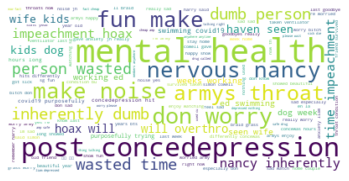

In [56]:
generate_word_cloud(streamed_tweet)

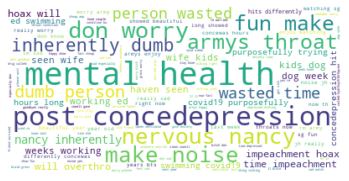

In [57]:
generate_word_cloud(df_hydrator)